In [1]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

%matplotlib inline

## Make fake data

0.07948398150989655
0.9205160184901034


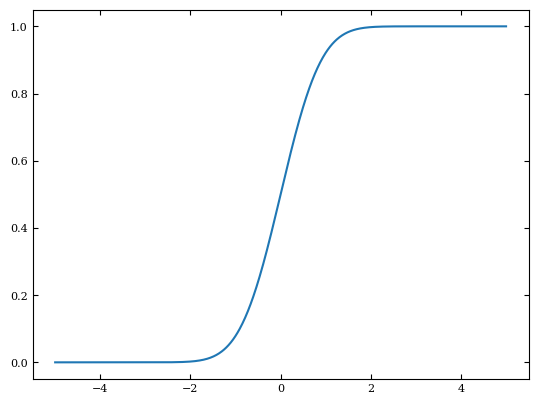

In [2]:
fig, ax = plt.subplots()

x = np.linspace(-5, 5, 1000)
y = (erf(x) + 1)/2
ax.plot(x, y)


print(y[np.argmin((x+1)**2)])
print(y[np.argmin((x-1)**2)])

The range from -sigma to +sigma is 8% to 92%.

2.3500235002350025


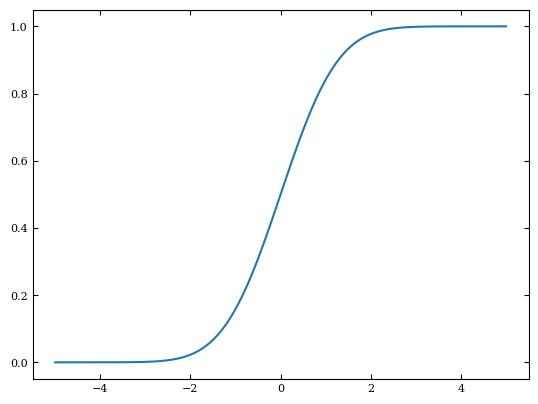

In [3]:
fig, ax = plt.subplots()

x = np.linspace(-5, 5, 100000)
sigma = 1
y = np.cumsum(np.exp(-x**2/(2*sigma**2)))
y = y/y.max()
ax.plot(x, y)

p0 = x[np.argmin((y-0.12)**2)]
p1 = x[np.argmin((y-0.88)**2)]
print(p1 - p0)

In [4]:
0.6824958171380402*2

1.3649916342760804

0.15887285138785892
0.8413686685258991
0.6824958171380402


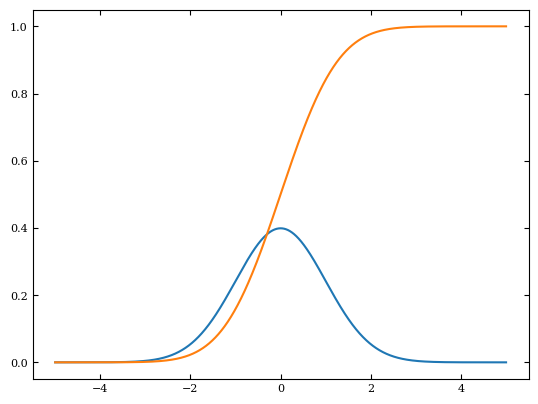

In [5]:
from lmfit.lineshapes import gaussian

sigma = 1

x = np.linspace(-5, 5, 10000)
dx = x[1] - x[0]
y = gaussian(x, sigma=sigma)
Sy = np.cumsum(y)*dx

fig, ax = plt.subplots()

ax.plot(x, y)
ax.plot(x, Sy)


p0 = Sy[np.argmin((x+sigma)**2)]
p1 = Sy[np.argmin((x-sigma)**2)]
print(p0)
print(p1)
print(p1 - p0)
